In [1]:
#Imported pandas and donor data from course.

import os
import sys
import re
import pprint as pp  #data pretty print
import pandas as pd
#pd.set_option('display.max_columns', 100)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

infile = "donors_data.csv"

In [2]:
# Determine the current working directory and review to ensure that the data environment is set
cwd = os.getcwd()
print(cwd)

c:\repos\text_mining\python\ist-652 scripting\Week 5\Week5PandaGraph


In [ ]:
# Change Directory to include the donors_data CSV and Data Dictionary  files
os.chdir('C:/Users/dland/programs')

In [4]:
#Read the Excel file into an object and created a data frame using pandas.
Data = pd.read_csv(infile) 
df = pd.DataFrame(Data)

#Viewed first 50 rows of the data frame to verify data was imported accurately.
df.head(20)



,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.00
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.00
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.00
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.00
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.00
5,6,53,0,1,0,0,1,1,4,1,...,28,38,73.0,10.0,10.0,31,3,7.300000,1,8.00
6,7,58,0,0,0,1,1,1,4,1,...,5,47,139.0,20.0,20.0,37,3,10.692308,1,10.00
7,8,61,1,0,0,0,1,1,1,0,...,9,77,249.0,15.0,7.0,35,3,9.576923,1,20.00
8,9,71,0,0,1,0,1,1,4,0,...,16,51,63.0,15.0,10.0,37,8,9.000000,1,5.00
9,10,87,1,0,0,0,1,1,4,1,...,8,21,26.0,16.0,16.0,30,6,13.000000,0,0.00


In [5]:
#Dropped any N/A values in the dataframe.

df.dropna()


,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3115,3116,23256,0,0,0,1,1,1,4,0,...,11,23,30.0,16.0,4.0,29,5,7.500000,0,0.0
3116,3117,23258,0,1,0,0,0,1,2,0,...,0,29,53.0,30.0,30.0,37,9,26.500000,1,40.0
3117,3118,23261,0,0,0,1,1,1,3,0,...,6,79,212.0,20.0,20.0,36,3,11.157895,0,0.0
3118,3119,23265,0,0,0,1,1,1,7,1,...,6,27,60.0,20.0,20.0,31,9,20.000000,0,0.0


In [6]:
#Used the describe function to get basic descriptive statistics of the data.



df.describe()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,...,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.00000,3120.000000
mean,1560.500000,11615.770833,0.214423,0.185256,0.214423,0.384615,0.770192,1.069231,3.893910,0.609295,...,14.702885,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713,0.50000,6.499612
std,900.810746,6698.678131,0.410487,0.388568,0.410487,0.486582,0.420777,0.347688,1.636186,0.487987,...,12.079882,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980,0.50008,10.597849
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.00000,0.000000
25%,780.750000,5820.750000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,...,5.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092,0.00000,0.000000
50%,1560.500000,11735.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,...,12.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,0.50000,0.500000
75%,2340.250000,17435.750000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,...,21.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652,1.00000,10.000000
max,3120.000000,23293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.000000,...,90.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,1.00000,200.000000


In [7]:
dftable1 = (df.pivot_table(index='INCOME', columns='gender dummy', values='AVGGIFT',
                aggfunc=['min','max'], fill_value=0))
dftable1

min                max            
gender dummy         0         1        0           1
INCOME                                               
1             2.916667  2.445946   40.875   31.742857
2             3.113636  2.138889   85.000   75.000000
3             3.166667  2.260870   50.000   30.000000
4             2.583333  2.625000   55.000  122.166667
5             3.106061  2.439815   50.000  100.000000
6             2.463415  2.354839   80.000   33.000000
7             3.370370  3.375000  100.000   66.666667

In [8]:
# Analyzed whether someone is or is not a current donor grouped by if they have a house, their wealth level, and gender (0 is male)
# The decimal shows percentage that are donors
# Findings: Among homeowners, on average women are more likely to be current donors than men. Among non-homeowners, men are more likely to be current donors than women.
# not in report
df['INCOME'].groupby([df['homeowner dummy'],df['AVGGIFT'],df['gender dummy']]).mean()

homeowner dummy  AVGGIFT     gender dummy
0                2.138889    1               2.0
                 2.445946    1               1.0
                 2.674419    0               4.0
                 2.709677    1               1.0
                 2.750000    1               3.0
                                            ... 
1                66.666667   1               7.0
                 77.571429   0               7.0
                 80.000000   0               6.0
                 100.000000  0               7.0
                 122.166667  1               4.0
Name: INCOME, Length: 1837, dtype: float64

In [9]:
#Created a pivot table that shows average donation by gender and homeownership and plotted as a bar graph.

#Shows that on avergae men and non-homeowners have slightly higher average donations.

dftable = (df.pivot_table(index='gender dummy', columns='homeowner dummy', values='AVGGIFT',
                aggfunc='mean', fill_value=0))
#   .plot.bar(stacked=False).set_ylabel("AVG Gift"),.set_xlabel('Gender: 0 = Male, 1 = Female'),.set_title('Average Gift Based on Homeownership and Gender'))

  

print(dftable)

homeowner dummy          0          1
gender dummy                         
0                11.493758  11.285624
1                10.294570  10.273546


AxesSubplot(0.125,0.125;0.775x0.755)


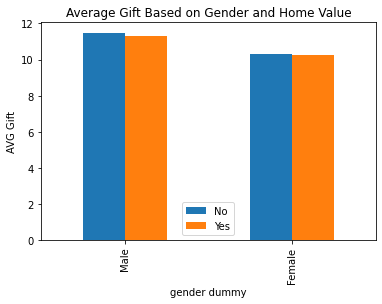

In [10]:
dplot = dftable.plot.bar(stacked=False)
labels = ['Male', 'Female']
leglabs = ['No', 'Yes']
dplot.legend(leglabs)
dplot.set_ylabel('AVG Gift')
dplot.set_title('Average Gift Based on Gender and Home Value')
dplot.set_xticklabels(labels)

print(dplot)

AxesSubplot(0.125,0.125;0.775x0.755)


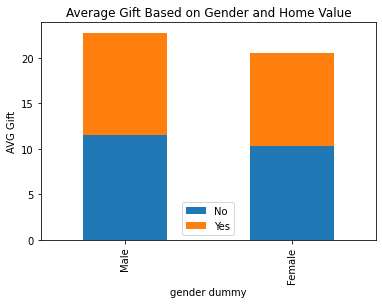

In [11]:
dplot = dftable.plot.bar(stacked=True)
labels = ['Male', 'Female']
leglabs = ['No', 'Yes']
dplot.legend(leglabs)
dplot.set_ylabel('AVG Gift')
dplot.set_title('Average Gift Based on Gender and Home Value')
dplot.set_xticklabels(labels)

print(dplot)

In [12]:
dftable = (df.pivot_table(index='INCOME', columns='gender dummy', values='AVGGIFT',
                aggfunc='mean', fill_value=0))
#   .plot.bar(stacked=False).set_ylabel("AVG Gift"),.set_xlabel('Gender: 0 = Male, 1 = Female'),.set_title('Average Gift Based on Homeownership and Gender'))

  

print(dftable)

gender dummy          0          1
INCOME                            
1             10.049163   9.177197
2             10.544070   9.446519
3             10.675751   9.258078
4             10.977899  10.294643
5             11.419804  10.669870
6             12.997330  11.494477
7             13.975618  12.673194


In [13]:
dftable.describe

<bound method NDFrame.describe of gender dummy          0          1
INCOME                            
1             10.049163   9.177197
2             10.544070   9.446519
3             10.675751   9.258078
4             10.977899  10.294643
5             11.419804  10.669870
6             12.997330  11.494477
7             13.975618  12.673194>

In [14]:
dftable.index

Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='INCOME')

AxesSubplot(0.125,0.125;0.775x0.755)


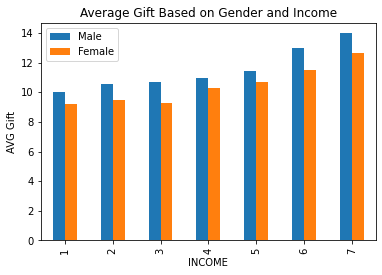

In [15]:
dplot = dftable.plot.bar(stacked=False)
#labels = ['1','2','3','4','5','6','7']
labels = dftable.index
leglabs = ['Male', 'Female']
dplot.legend(leglabs)
dplot.set_ylabel('AVG Gift')
dplot.set_title('Average Gift Based on Gender and Income')
dplot.set_xticklabels(labels)

print(dplot)

In [16]:
dfIncome = df['INCOME'].groupby([df['INCOME']]).count()
dfIncome

INCOME
1     282
2     468
3     296
4    1053
5     535
6     246
7     240
Name: INCOME, dtype: int64

In [17]:
print(type(dfIncome))
dfIncome.describe


<class 'pandas.core.series.Series'>


<bound method NDFrame.describe of INCOME
1     282
2     468
3     296
4    1053
5     535
6     246
7     240
Name: INCOME, dtype: int64>

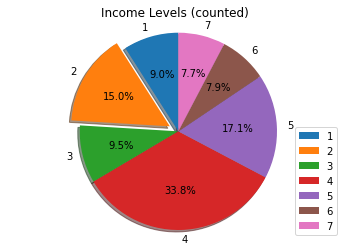

In [18]:
labels = dfIncome.index
sizes = dfIncome
explode = (0, 0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(dfIncome.index, loc = 'lower right')
plt.title('Income Levels (counted)')
plt.show()